<a href="https://colab.research.google.com/github/Hydrateacher/segmentation_classification2/blob/main/segmentation_classification2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import fastai

In [2]:
from fastai.vision.all import *

path = untar_data(URLs.CAMVID_TINY)

path.ls()


(#3) [Path('/root/.fastai/data/camvid_tiny/labels'),Path('/root/.fastai/data/camvid_tiny/images'),Path('/root/.fastai/data/camvid_tiny/codes.txt')]

In [3]:
def label_getter(file):
  return path/'labels'/f"{file.stem}_P{file.suffix}"

dls = SegmentationDataLoaders.from_label_func(path, bs=8, fnames=get_image_files(path/'images'),
                                              label_func=label_getter,
                                              codes=np.loadtxt(path/'codes.txt', dtype=str))
learn = unet_learner(dls, resnet50)
learn.fine_tune(12)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 240MB/s]


epoch,train_loss,valid_loss,time
0,4.686187,2.617090,00:16


epoch,train_loss,valid_loss,time
0,2.036662,1.724908,00:08
1,1.707106,1.426456,00:08
2,1.525478,1.132952,00:08
3,1.418356,1.267290,00:08
4,1.339607,1.023235,00:08
5,1.245039,0.924820,00:08
6,1.147522,0.846770,00:08
7,1.050652,0.731835,00:08
8,0.961293,0.707760,00:08
9,0.888441,0.689323,00:08


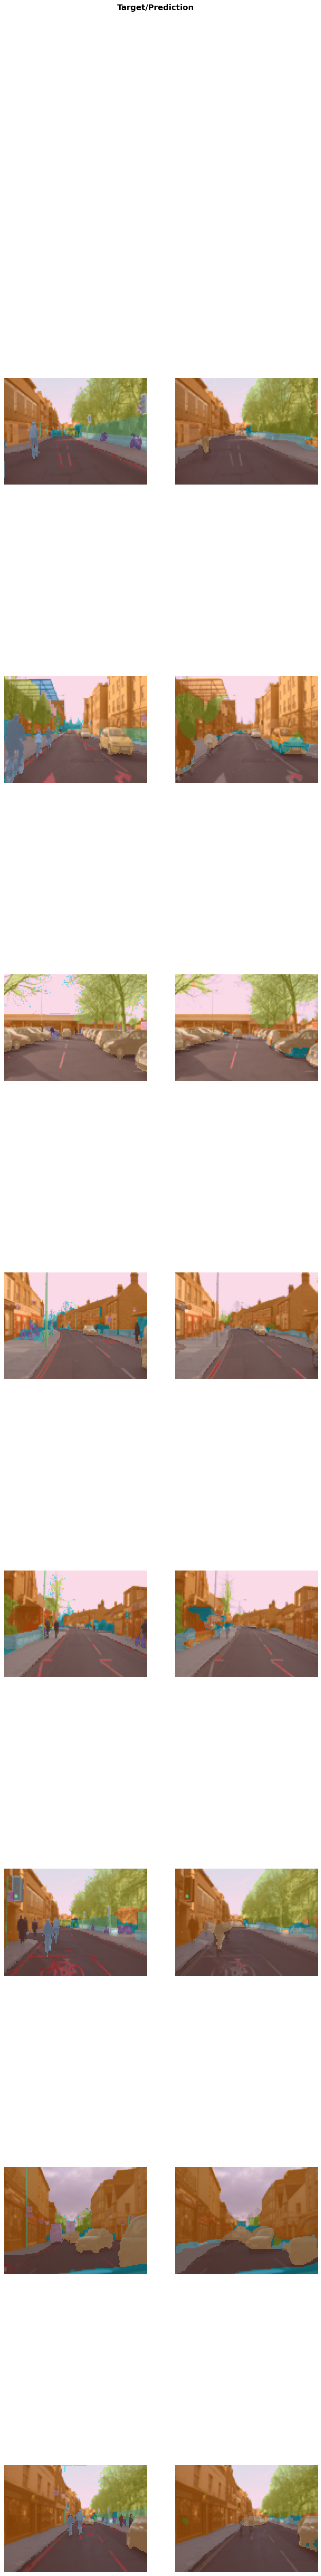

In [8]:
learn.show_results(max_n=25, figsize=(10,75))
